# Title

## Introduction

## Preliminary exploratory data analysis

### Clean and tidy dataset read from the web

In [1]:
library(tidyverse)
library(repr)
library(cowplot)
options(repr.matrix.max.rows = 4)
url <- "https://raw.githubusercontent.com/ljy0401/DSCI-100-Group-Project-Group-27/main/raisin_dataset.csv"
raisin_data <- read_csv(url) %>% select(Area, ConvexArea, Perimeter, Class)
raisin_his <- raisin_data %>% pivot_longer(cols=Area:Perimeter, names_to= "Predictor", values_to= "Measurment")
raisin_data


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”
Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)



Area,ConvexArea,Perimeter,Class
<dbl>,<dbl>,<dbl>,<chr>
87524,90546,1184.040,Kecimen
75166,78789,1121.786,Kecimen
⋮,⋮,⋮,⋮
93523,97653,1258.548,Besni
85609,89197,1272.862,Besni


### Dataset Summary


In [9]:
tb <- tibble(
  `#Observations` = c("900", "", "" ),  `#Variables` = c(7,"" ,"" ), 
  ` Classes` = c("Kecimen (450)", "Besni (450)", "" ),
    `Selected_Variables` = c("Area", "Convex Area", "Perimeter")
)
tb
raisin_data_mean <- raisin_data %>% group_by(Class) %>%
summarize(Avg_Area=mean(Area),Min_Area= min(Area), Max_Area=max(Area), Avg_Perimeter= mean(Perimeter),Min_Perimeter= min(Perimeter), Max_Perimeter=max(Perimeter), Avg_Convex= mean(ConvexArea), Min_Convex= min(ConvexArea), Max_Convex=max(ConvexArea) )
raisin_data_mean

raisins_data_scatter <- raisin_data %>% pivot_longer(cols=Area: ConvexArea, names_to= "Type_Area", values_to="Area")


#Observations,#Variables,Classes,Selected_Variables
<chr>,<chr>,<chr>,<chr>
900,7,Kecimen (450),Area
,,Besni (450),Convex Area
,,,Perimeter


`summarise()` ungrouping output (override with `.groups` argument)



Class,Avg_Area,Min_Area,Max_Area,Avg_Perimeter,Min_Perimeter,Max_Perimeter,Avg_Convex,Min_Convex,Max_Convex
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Besni,112194.79,40702,235047,1348.1270,771.797,2697.753,116675.82,41924,278217
Kecimen,63413.47,25387,180898,983.6862,619.074,2253.557,65696.36,26139,221396


### Visualization of the Raisin dataset

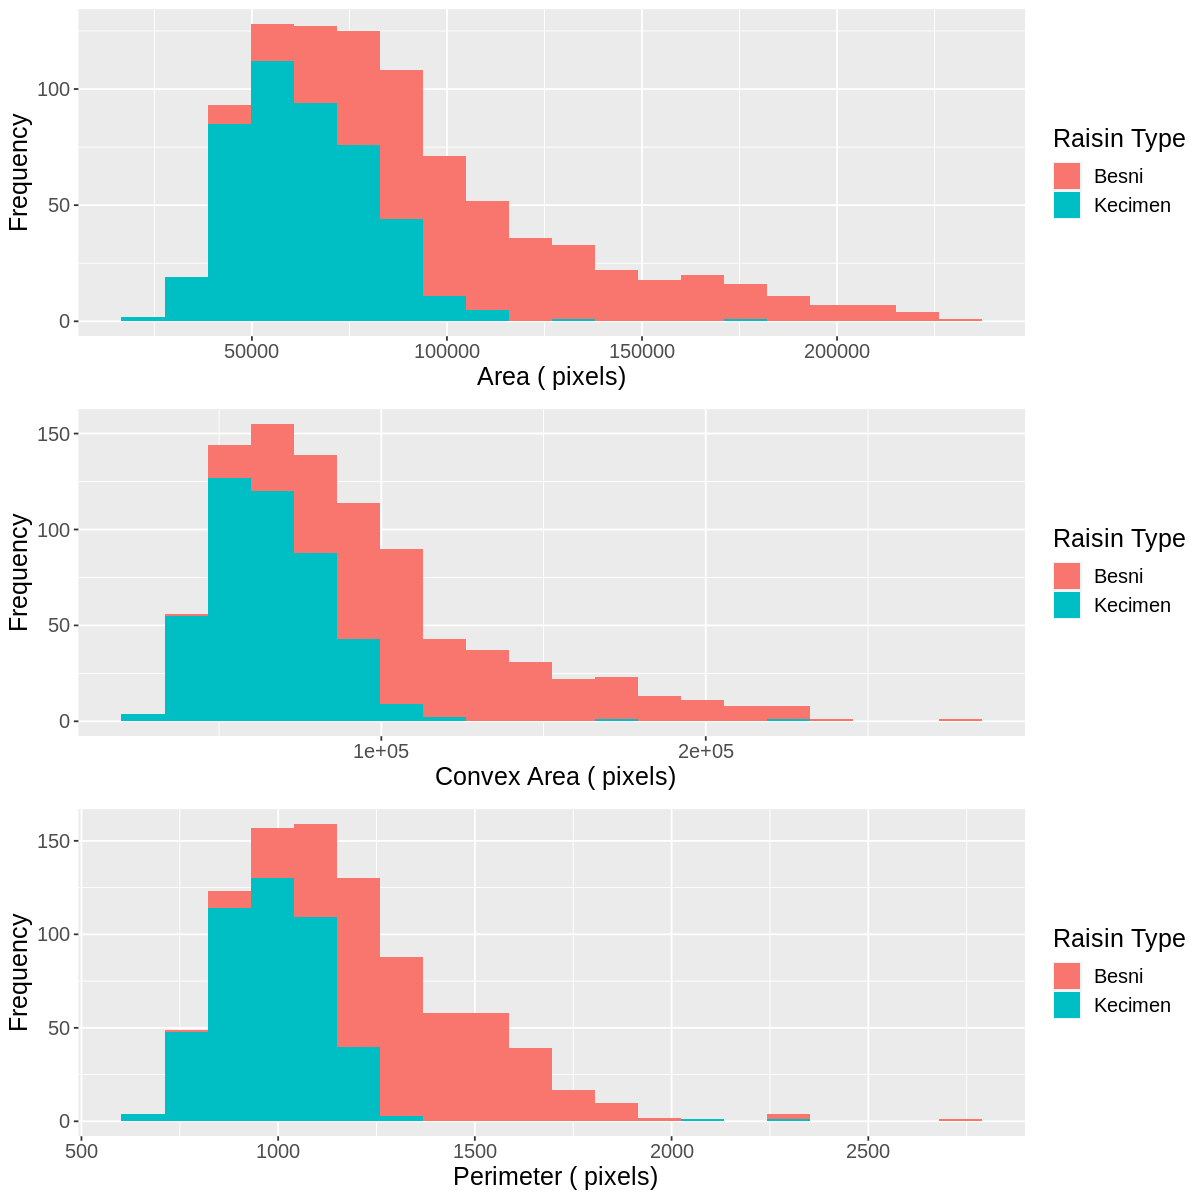

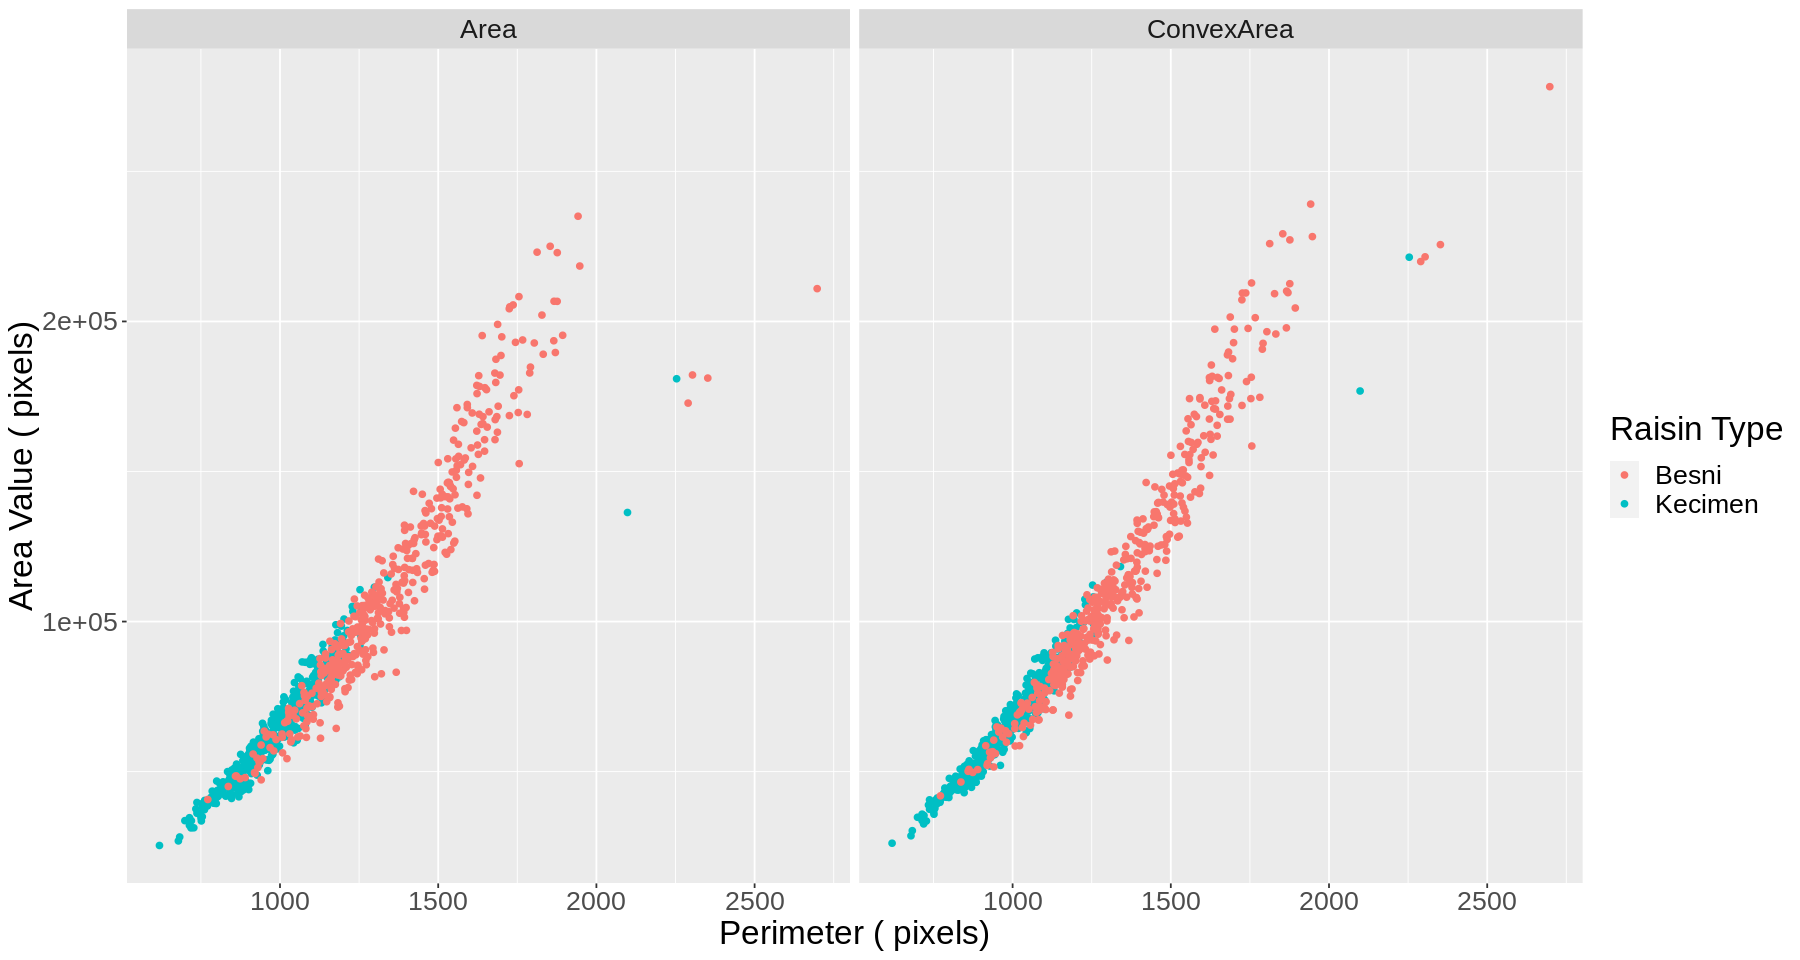

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10) 
area_plot <- raisin_data %>% ggplot(aes(x=Area)) +
    geom_histogram(aes(fill=Class), bins=20) +
labs(x="Area ( pixels)",y= "Frequency", fill="Raisin Type")+ 
theme(text = element_text(size = 15))

convex_plot <- raisin_data %>% ggplot(aes(x=ConvexArea)) +
    geom_histogram(aes(fill=Class), bins=20) +
labs(x=" Convex Area ( pixels)",y= "Frequency", fill="Raisin Type")+ 
theme(text = element_text(size = 15))

perimeter_plot <- raisin_data %>% ggplot(aes(x=Perimeter)) +
    geom_histogram(aes(fill=Class), bins=20) +
labs(x=" Perimeter ( pixels)",y= "Frequency", fill="Raisin Type")+ 
theme(text = element_text(size = 15))

plot_grid(area_plot, convex_plot, perimeter_plot, ncol = 1)+ ggtitle("Perimeter Distribution among Raisins")

options(repr.plot.width = 15, repr.plot.height = 8) 
scatter_raisin <- raisins_data_scatter %>% ggplot(aes(x=Perimeter, y=Area)) +
    geom_point(aes(colour=Class)) +
labs(x="Perimeter ( pixels)",y= "Area Value ( pixels)", colour="Raisin Type")+
facet_grid( . ~ Type_Area) +
theme(text = element_text(size = 20))
scatter_raisin 